In [2]:
import matplotlib.pyplot as plt
import numpy as np


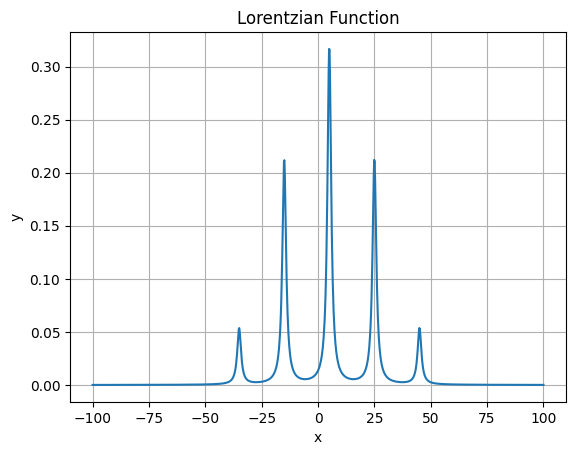

In [5]:
def pascal(x):
    triangle = []
    for i in range(x):
        row = [1]
        if i > 0:
            prev_row = triangle[-1]
            for j in range(len(prev_row) - 1):
                row.append(prev_row[j] + prev_row[j + 1])
            row.append(1)
        triangle.append(row)
    return triangle[-1]

def lorentzian(x, mean, variance):
    return 1 / (np.pi * variance * (1 + ((x - mean) / variance) ** 2))

def multiplet(x, mult, mean, sigma, spacing, type='lorentz'):
    triangle = pascal(mult)
    t_max = max(triangle)
    triangle = [t/t_max for t in triangle]
    y = np.zeros(len(x),dtype=float)
    if type == 'lorentz':
        if len(triangle)%2 == 0:
            space = -1*len(triangle)/2*spacing+spacing/2
        else:
            space = -1*(len(triangle)-1)/2*spacing


        for i,size in enumerate(triangle):
            y += lorentzian(x, mean+space, sigma)*size
            space +=  spacing
    return y


Y = multiplet(5, 5, 1, 20)

plt.plot(np.linspace(-100,100,1000), Y)
plt.title('Lorentzian Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()